# Deep Learning - Anomaly Detection
### **Task 2**

| Componente | Matricola |
| --- | --- |
| Gianfranco Sapia | 223954 |
| Andrea De Seta | 227755 |

## **Data Understanding**

In [43]:
import os
import numpy as np

#### **Load dataset**

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
train_path = '/content/drive/MyDrive/Deep Learning Project/Task 2/ad_train.csv' #only for colab
test_path = '/content/drive/MyDrive/Deep Learning Project/Task 2/ad_test.csv' #only for colab

#train_path = 'ad_train.csv'
#test_path = 'ad_test.csv'

In [46]:
import pandas as pd

train_data_loaded = pd.read_csv(train_path)
test_data_loaded = pd.read_csv(test_path)
train_data_loaded

,patient,x,y,z,heartRate,timestamp,tsDate
0,1502,23,569,878,-1,1568073600000,2019-09-10 00:00:00.003
1,1502,23,571,878,-1,1568073601000,2019-09-10 00:00:01.014
2,1502,23,570,878,-1,1568073602000,2019-09-10 00:00:02.025
3,1502,23,570,878,-1,1568073603000,2019-09-10 00:00:03.035
4,1502,23,570,878,-1,1568073604000,2019-09-10 00:00:04.046
...,...,...,...,...,...,...,...
943517,4506,-636,-399,-654,57,1572479994000,2019-10-30 23:59:54.315
943518,4506,-639,-396,-654,57,1572479995000,2019-10-30 23:59:55.316
943519,4506,-638,-396,-655,57,1572479996000,2019-10-30 23:59:56.336
943520,4506,-637,-396,-655,58,1572479997000,2019-10-30 23:59:57.337


##### **Data dimension**

In [47]:
train_data_loaded.size

6604654

In [48]:
train_data_loaded.shape

(943522, 7)

##### **Get attribute type and general statistics**

In [49]:
train_data_loaded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943522 entries, 0 to 943521
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   patient    943522 non-null  int64 
 1   x          943522 non-null  int64 
 2   y          943522 non-null  int64 
 3   z          943522 non-null  int64 
 4   heartRate  943522 non-null  int64 
 5   timestamp  943522 non-null  int64 
 6   tsDate     943522 non-null  object
dtypes: int64(6), object(1)
memory usage: 50.4+ MB


In [50]:
train_data_loaded.describe()

,patient,x,y,z,heartRate,timestamp
count,943522.000000,943522.000000,943522.000000,943522.000000,943522.000000,9.435220e+05
mean,2965.730395,-82.993777,265.351292,-203.930526,70.203571,1.570917e+12
std,1318.330121,577.033231,539.747675,534.955382,20.973755,2.063158e+09
min,1502.000000,-1649.000000,-1082.000000,-1256.000000,-1.000000,1.568074e+12
25%,1505.000000,-532.000000,-59.000000,-665.000000,61.000000,1.568135e+12
50%,3507.000000,-91.000000,313.000000,-223.000000,70.000000,1.572414e+12
75%,4502.000000,311.000000,739.000000,125.000000,82.000000,1.572447e+12
max,4506.000000,1796.000000,1644.000000,1127.000000,182.000000,1.572480e+12


In [51]:
train_data_loaded['x'] = train_data_loaded['x'].astype('float64')
train_data_loaded['y'] = train_data_loaded['y'].astype('float64')
train_data_loaded['z'] = train_data_loaded['z'].astype('float64')
train_data_loaded['heartRate'] = train_data_loaded['heartRate'].astype('float64')
train_data_loaded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943522 entries, 0 to 943521
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   patient    943522 non-null  int64  
 1   x          943522 non-null  float64
 2   y          943522 non-null  float64
 3   z          943522 non-null  float64
 4   heartRate  943522 non-null  float64
 5   timestamp  943522 non-null  int64  
 6   tsDate     943522 non-null  object 
dtypes: float64(4), int64(2), object(1)
memory usage: 50.4+ MB


In [52]:
id_patients = train_data_loaded['patient'].values
id_patients = np.unique(id_patients)
id_patients

array([1502, 1503, 1505, 1507, 1509, 3506, 3507, 3508, 3509, 4502, 4504,
       4505, 4506])

##### **Data visualization**

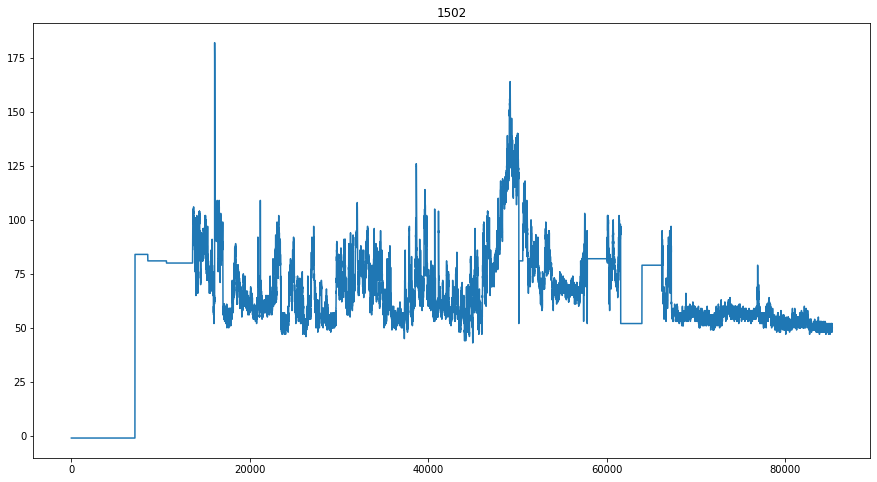

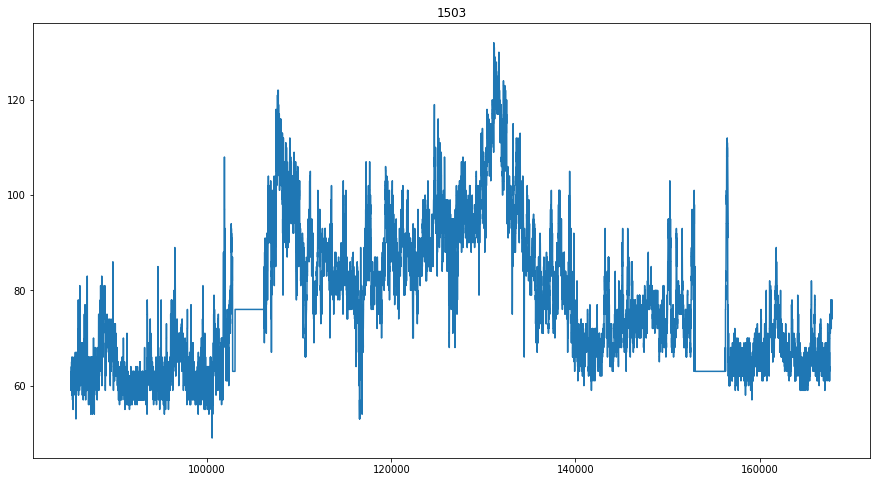

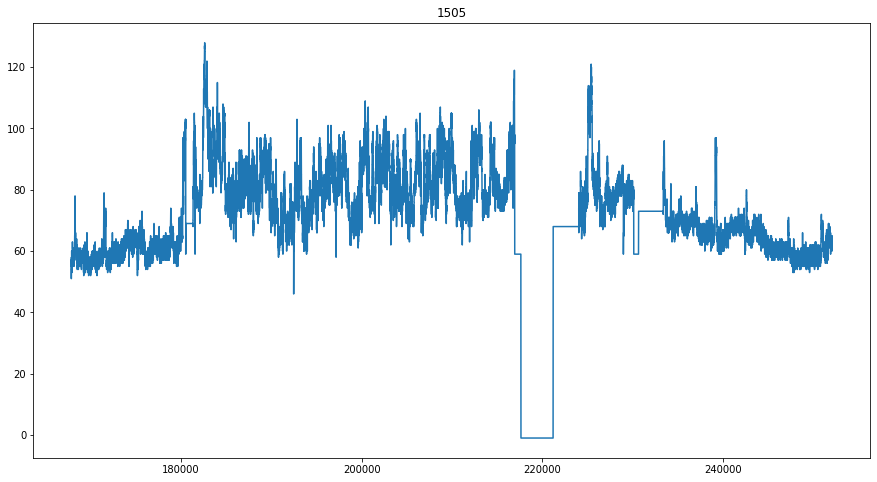

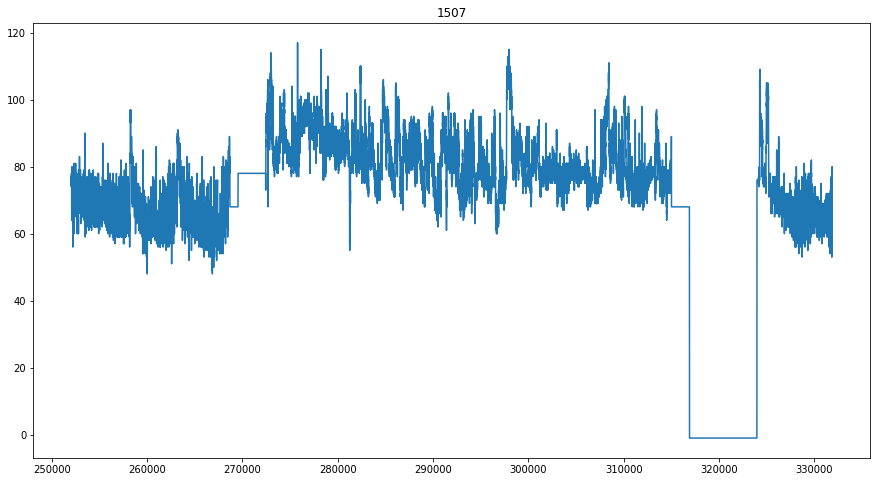

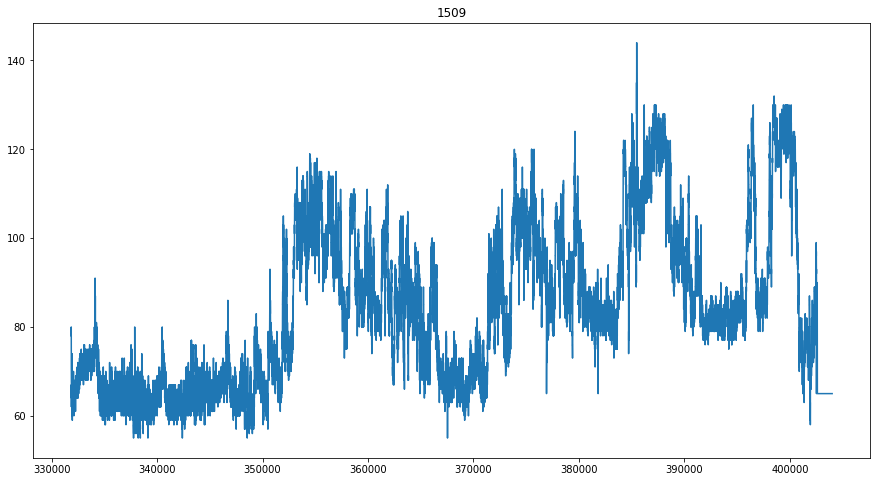

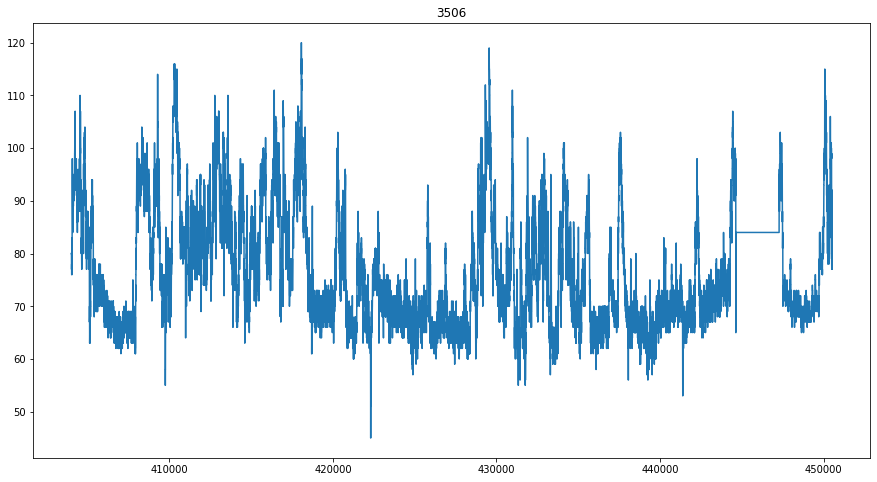

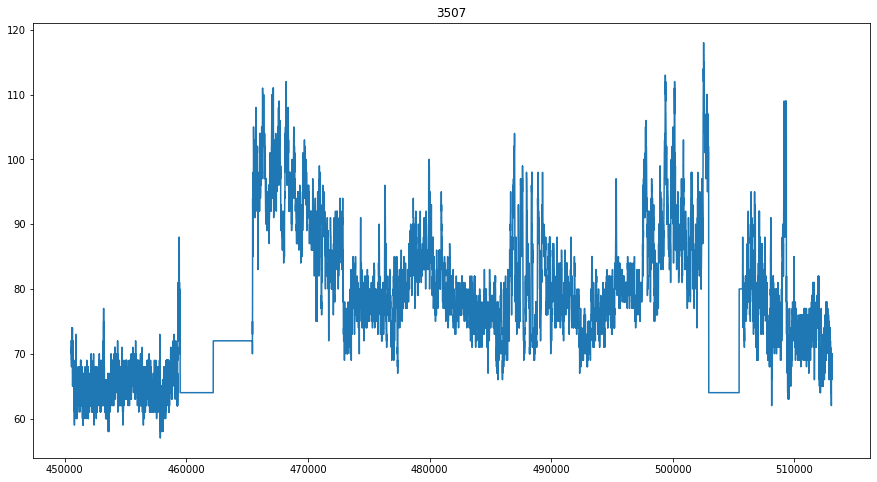

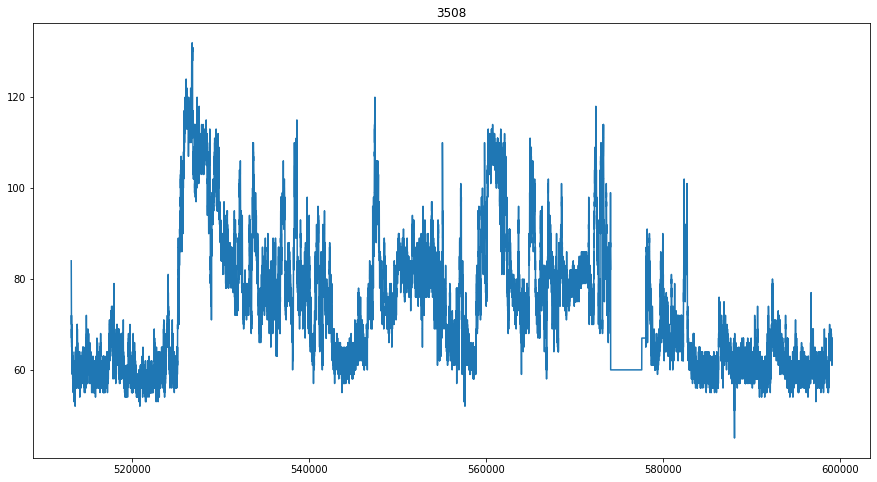

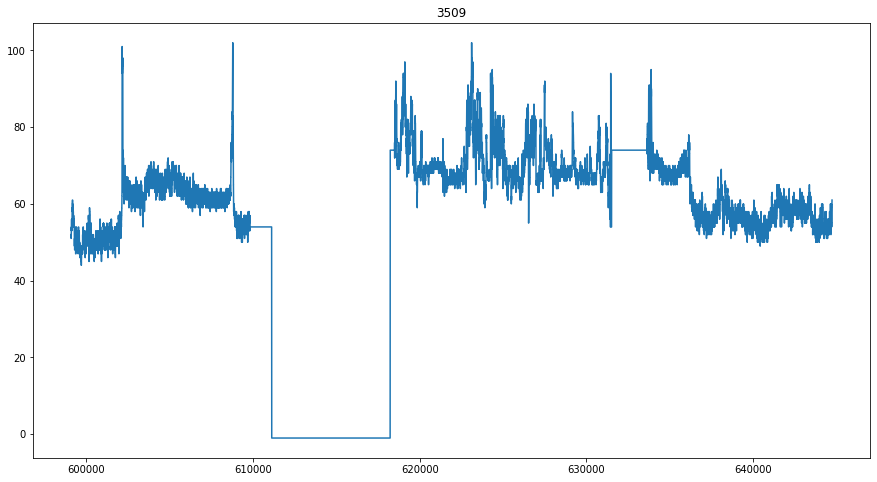

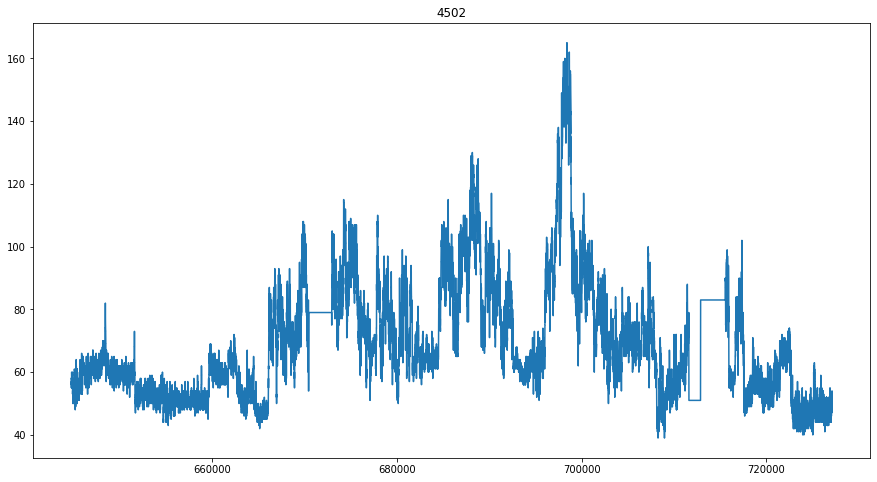

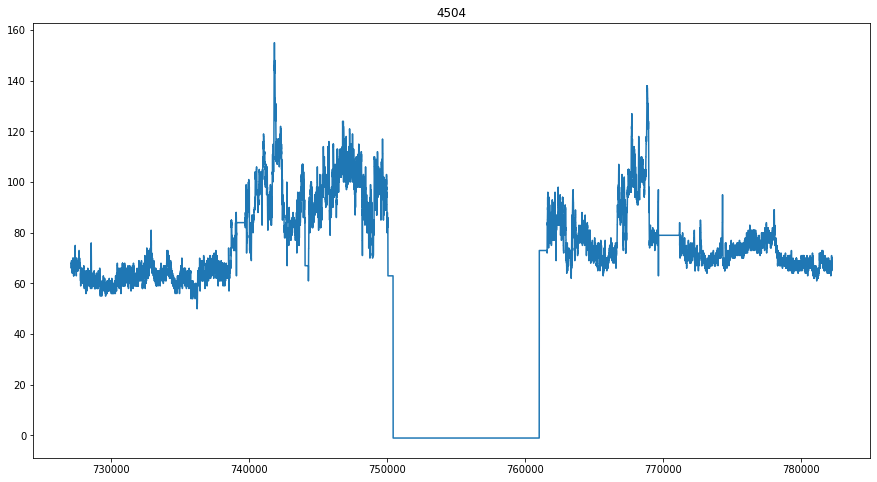

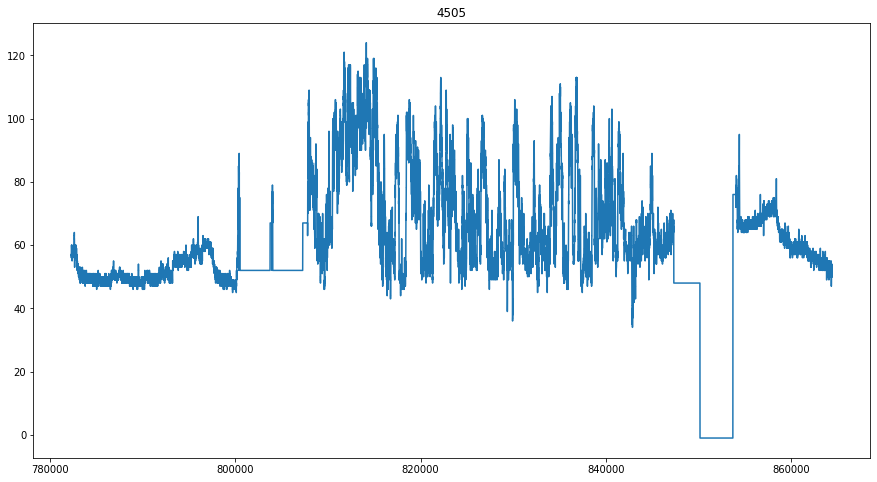

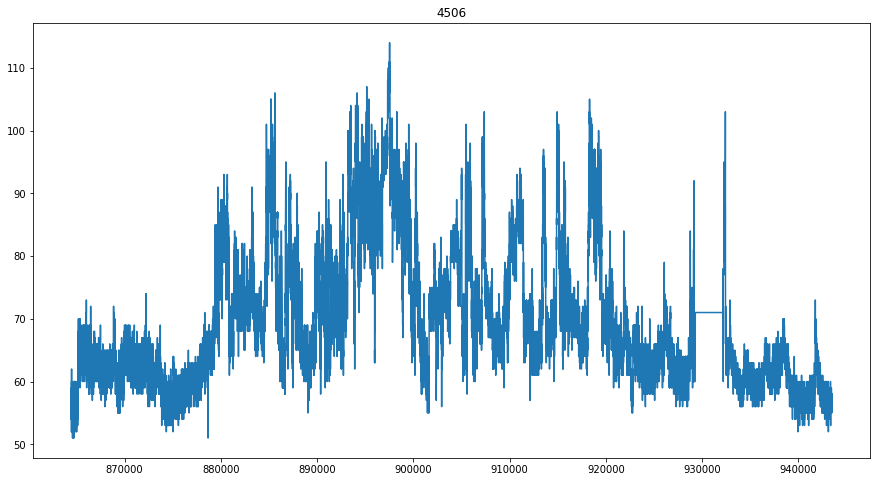

In [53]:
import matplotlib.pyplot as plt

for id in id_patients:
  heartrate = train_data_loaded['heartRate'].where(train_data_loaded['patient'] == id)
  fig = plt.figure(figsize=(15, 8))
  plt.plot(heartrate)
  plt.title(id)

In [54]:
ids_missing_hr = [1502, 1505, 1507, 3509, 4504, 4505]

In [55]:
timeslots = []
for id in ids_missing_hr:
  filter1 = train_data_loaded['patient'] == id
  filter2 = train_data_loaded['heartRate'] == -1
  timeslot = train_data_loaded['tsDate'].where(filter1 & filter2).dropna()
  timeslots.append(timeslot)

In [56]:
timeslots[1].index[0]

217619

In [57]:
from datetime import datetime

for ts in timeslots:
  last_date = ts.values[-1]
  first_date = ts.values[0]
  last = datetime.strptime(last_date, "%Y-%m-%d %H:%M:%S.%f")
  first = datetime.strptime(first_date, "%Y-%m-%d %H:%M:%S.%f")
  print("Initial time :" + str(first))
  print("Last time :" + str(last))
  print("Time passed :" + str(last-first) + "\n")

Initial time :2019-09-10 00:00:00.003000
Last time :2019-09-10 01:59:58.395000
Time passed :1:59:58.392000

Initial time :2019-09-10 14:00:00.007000
Last time :2019-09-10 14:59:58.542000
Time passed :0:59:58.535000

Initial time :2019-09-10 19:00:00.016000
Last time :2019-09-10 20:59:58.105000
Time passed :1:59:58.089000

Initial time :2019-10-30 06:00:00.005000
Last time :2019-10-30 07:59:58.754000
Time passed :1:59:58.749000

Initial time :2019-10-30 15:00:00.012000
Last time :2019-10-30 17:59:58.767000
Time passed :2:59:58.755000

Initial time :2019-10-30 20:00:00.002000
Last time :2019-10-30 20:59:58.327000
Time passed :0:59:58.325000



## **Data Preparation**

##### **Patient series split**
Nella cella sottostante verrà ricreato l'array con le sequenze per ogni paziente dove però le series dei pazienti con dei valori di "Heartrate" a -1 verranno considerate come due series: una a sinistra dei valori di "-1" ed una a destra dei valori di "-1"

In [58]:
new_data = []

filter_hr = train_data_loaded['heartRate'] == -1
for id in id_patients:
  
  filter_id = train_data_loaded['patient'] == id
  
  series = train_data_loaded.where(filter_id).dropna()
  
  if id in ids_missing_hr:
    missing_hr_row = train_data_loaded.where(filter_id & filter_hr).dropna()

    left_series = train_data_loaded[series.index[0]:missing_hr_row.index[0]]
    right_series = train_data_loaded[missing_hr_row.index[-1]+1:series.index[-1]]

    if (len(left_series)) != 0:
        new_data.append(left_series)
    
    if (len(right_series)) != 0:
        new_data.append(right_series)
    #pass
  else:
    new_data.append(series)

In [59]:
new_data

[       patient      x      y      z  heartRate      timestamp  \
 7120      1502   23.0  570.0  878.0       84.0  1568080800000   
 7121      1502   23.0  571.0  878.0       84.0  1568080801000   
 7122      1502   23.0  571.0  878.0       84.0  1568080802000   
 7123      1502   23.0  571.0  877.0       84.0  1568080803000   
 7124      1502   23.0  571.0  878.0       84.0  1568080804000   
 ...        ...    ...    ...    ...        ...            ...   
 85238     1502  301.0 -851.0  516.0       50.0  1568159992000   
 85239     1502  300.0 -851.0  514.0       50.0  1568159994000   
 85240     1502  300.0 -851.0  515.0       50.0  1568159995000   
 85241     1502  300.0 -850.0  515.0       50.0  1568159996000   
 85242     1502  300.0 -851.0  516.0       50.0  1568159997000   
 
                         tsDate  
 7120   2019-09-10 02:00:00.000  
 7121   2019-09-10 02:00:01.010  
 7122   2019-09-10 02:00:02.022  
 7123   2019-09-10 02:00:03.033  
 7124   2019-09-10 02:00:04.376  
 .

In [60]:
new_data[0].head(20)

,patient,x,y,z,heartRate,timestamp,tsDate
7120,1502,23.0,570.0,878.0,84.0,1568080800000,2019-09-10 02:00:00.000
7121,1502,23.0,571.0,878.0,84.0,1568080801000,2019-09-10 02:00:01.010
7122,1502,23.0,571.0,878.0,84.0,1568080802000,2019-09-10 02:00:02.022
7123,1502,23.0,571.0,877.0,84.0,1568080803000,2019-09-10 02:00:03.033
7124,1502,23.0,571.0,878.0,84.0,1568080804000,2019-09-10 02:00:04.376
7125,1502,23.0,571.0,878.0,84.0,1568080805000,2019-09-10 02:00:05.392
7126,1502,23.0,571.0,877.0,84.0,1568080806000,2019-09-10 02:00:06.402
7127,1502,23.0,570.0,877.0,84.0,1568080807000,2019-09-10 02:00:07.413
7128,1502,23.0,571.0,878.0,84.0,1568080808000,2019-09-10 02:00:08.423
7129,1502,23.0,570.0,876.0,84.0,1568080809000,2019-09-10 02:00:09.434


##### **Patient series split**
Nella cella sottostante verrà ricreato l'array con le sequenze per ogni paziente dove però le series dei pazienti con dei valori di "Heartrate" a -1 verranno considerate come due series: una a sinistra dei valori di "-1" ed una a destra dei valori di "-1"

In [61]:
for rows_index in range(0,len(new_data)):
  
    new_data[rows_index] = new_data[rows_index].drop(columns=["patient","timestamp","tsDate"])
    new_data[rows_index] = new_data[rows_index].rolling(10).mean()

    new_data[rows_index] = new_data[rows_index][::10].dropna()

In [62]:
new_data[0].head(20)

,x,y,z,heartRate
7130,23.0,570.9,877.4,84.0
7140,23.2,570.9,877.4,84.0
7150,22.9,570.7,877.6,84.0
7160,23.0,570.8,877.1,84.0
7170,23.0,570.6,877.4,84.0
7180,23.2,570.9,877.8,84.0
7190,23.2,570.9,877.4,84.0
7200,23.2,570.3,877.4,84.0
7210,23.1,570.8,877.6,84.0
7220,22.9,570.9,877.4,84.0


In [63]:
test_data_loaded = [d for _, d in test_data_loaded.groupby(['patient'])]

In [64]:
for id in test_data_loaded:
    id.index = np.arange(0, len(id))

In [65]:
test_data_copy = test_data_loaded

##### **Trainset normalization**

In [66]:
mean_test = 0
std_test = 0
for rows_index in range(0,len(new_data)):
    mean_test += new_data[rows_index].mean()
    std_test += new_data[rows_index].std()

mean_test = mean_test / len(new_data)
std_test = std_test / len(new_data)

test_data = []
for id in test_data_loaded:
    patient_rows = id.drop(columns=['patient','timestamp','tsDate'])
    patient_rows = (patient_rows - mean_test) / std_test
    test_data.append(patient_rows)

In [67]:
for rows_index in range(0,len(new_data)):
    mean = new_data[rows_index].mean()
    std = new_data[rows_index].std()

    new_data[rows_index] = (new_data[rows_index] - mean)/std

In [68]:
new_data[0].head(20)

,x,y,z,heartRate
7130,0.220730,0.333616,2.549764,0.936616
7140,0.221095,0.333616,2.549764,0.936616
7150,0.220547,0.333252,2.550221,0.936616
7160,0.220730,0.333434,2.549079,0.936616
7170,0.220730,0.333070,2.549764,0.936616
7180,0.221095,0.333616,2.550678,0.936616
7190,0.221095,0.333616,2.549764,0.936616
7200,0.221095,0.332524,2.549764,0.936616
7210,0.220912,0.333434,2.550221,0.936616
7220,0.220547,0.333616,2.549764,0.936616


In [69]:
for d in new_data:
    print(d.shape)

print(max(d.shape[0] for d in new_data))

(7812, 4)
(8263, 4)
(4973, 4)
(3086, 4)
(6484, 4)
(789, 4)
(7212, 4)
(4652, 4)
(6258, 4)
(8596, 4)
(1203, 4)
(2652, 4)
(8236, 4)
(2332, 4)
(2123, 4)
(6789, 4)
(1072, 4)
(7907, 4)
8596


##### **Data Windowing**
Le due funzioni sottostanti verranno utilizzate rispettivamente dal training set e dal test set. La prima funzione tornerà un'array di sequenze raccolte da ogni paziente. La seconda funzione tornerà un'array di sequenze di quel solo paziente

In [70]:
def data_windowing(data, lookback, step):
    
    patient_series = []

    for patient_id_index in range(0,len(data)):
        for i in range(0, len(data[patient_id_index]) - lookback - 1, step):
            patient_series.append(data[patient_id_index][i: i + lookback])
      
    patient_series = np.array(patient_series)
    patient_series = patient_series.reshape((patient_series.shape[0], patient_series.shape[1], 4))
    return patient_series

def data_windowing_test(data, lookback, step):
    
    patient_series = []
    
    for i in range(0, len(data) - lookback - 1, step):
        patient_series.append(data[i: i + lookback])
      
    patient_series = np.array(patient_series)
    patient_series = patient_series.reshape((patient_series.shape[0], patient_series.shape[1], 4))
    return patient_series

##### **Validation data split**

In [71]:
val_data = []
train_data = []
for data in new_data:
  
    len_split = round(data.shape[0]*0.7)
  
    train_data.append(data[:len_split])
    val_data.append(data[len_split:])

In [72]:
win_size = 30
win_shift = 1

x_train = data_windowing(train_data, win_size, win_shift)
x_val = data_windowing(val_data, win_size, win_shift)

seq_test = []
for p in test_data:
    seq_test.append(data_windowing_test(p, win_size, win_shift))

In [73]:
x_train.shape

(62746, 30, 4)

In [74]:
x_val.shape

(26577, 30, 4)

## **Modeling**

In [75]:
pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [76]:
import tensorflow as tf
from tensorflow.keras import models, layers

import keras_tuner as kt

my_seed = 44
np.random.seed(my_seed)
tf.random.set_seed(my_seed)

In [77]:
seq_len = x_train.shape[1]
num_feat = x_train.shape[2]

##### **Create the models**
Per quanto riguarda gli hyperparameters sul numero di neuroni e sul learning rate verrà effettuata una ricerca attraverso un hypertuner per riuscire a ricostruire quello che sarà il best model. Il modello che siamo interessati a creare è un autoencoder che utilizza come layer "LSTM", "Dropout", "RepeatVector" e "TimeDistributed".

In [78]:
model = tf.keras.Sequential()
model.add(layers.LSTM(112, input_shape=(seq_len, num_feat)))
model.add(layers.Dropout(rate=0.2))
model.add(layers.RepeatVector(seq_len))
model.add(layers.LSTM(112, return_sequences=True))
model.add(layers.Dropout(rate=0.2))
model.add(layers.TimeDistributed(layers.Dense(num_feat)))
# Tune the learning rate for the optimizer
# Choose an optimal value from 0.01, 0.001, or 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2), loss = 'mae')

In [79]:
history = model.fit(x_train, x_train, epochs=25, validation_data=(x_val,x_val))

Epoch 1/25
1961/1961 [==============================] - 32s 15ms/step - loss: 0.3377 - val_loss: 0.2337
Epoch 2/25
1961/1961 [==============================] - 16s 8ms/step - loss: 0.2750 - val_loss: 0.1955
Epoch 3/25
1961/1961 [==============================] - 16s 8ms/step - loss: 0.2552 - val_loss: 0.1806
Epoch 4/25
1961/1961 [==============================] - 16s 8ms/step - loss: 0.2436 - val_loss: 0.1722
Epoch 5/25
1961/1961 [==============================] - 17s 9ms/step - loss: 0.2349 - val_loss: 0.1622
Epoch 6/25
1961/1961 [==============================] - 16s 8ms/step - loss: 0.2287 - val_loss: 0.1549
Epoch 7/25
1961/1961 [==============================] - 16s 8ms/step - loss: 0.2235 - val_loss: 0.1572
Epoch 8/25
1961/1961 [==============================] - 16s 8ms/step - loss: 0.2192 - val_loss: 0.1537
Epoch 9/25
1961/1961 [==============================] - 16s 8ms/step - loss: 0.2156 - val_loss: 0.1461
Epoch 10/25
1961/1961 [==============================] - 17s 9ms/step - 

In [80]:
loss_per_epoch = history.history['loss']
best_epoch = loss_per_epoch.index(min(loss_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Best epoch: 11


##### Retrain the model
Ricostruzione del best model sulla base degli hyperparameters ottimali trovati (numero di neuroni, learning rate e miglior minor numero di epoche)

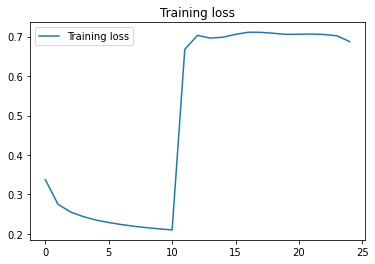

In [81]:
# Plotting results

import matplotlib.pyplot as plt

loss = history.history['loss'] 
epochs = range(len(loss))

plt.plot(epochs, loss,  label='Training loss')
plt.title('Training loss')
plt.legend()
plt.show()

In [85]:
model = tf.keras.Sequential()
model.add(layers.LSTM(112, input_shape=(seq_len, num_feat)))
model.add(layers.Dropout(rate=0.2))
model.add(layers.RepeatVector(seq_len))
model.add(layers.LSTM(112, return_sequences=True))
model.add(layers.Dropout(rate=0.2))
model.add(layers.TimeDistributed(layers.Dense(num_feat)))
# Tune the learning rate for the optimizer
# Choose an optimal value from 0.01, 0.001, or 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2), loss = 'mae')

In [86]:
history = model.fit(x_train, x_train, epochs=best_epoch, validation_data=(x_val,x_val))

Epoch 1/11
1961/1961 [==============================] - 24s 9ms/step - loss: 0.3372 - val_loss: 0.2254
Epoch 2/11
1961/1961 [==============================] - 16s 8ms/step - loss: 0.2781 - val_loss: 0.1995
Epoch 3/11
1961/1961 [==============================] - 16s 8ms/step - loss: 0.2583 - val_loss: 0.1875
Epoch 4/11
1961/1961 [==============================] - 16s 8ms/step - loss: 0.2464 - val_loss: 0.1800
Epoch 5/11
1961/1961 [==============================] - 17s 9ms/step - loss: 0.2378 - val_loss: 0.1672
Epoch 6/11
1961/1961 [==============================] - 16s 8ms/step - loss: 0.2314 - val_loss: 0.1619
Epoch 7/11
1961/1961 [==============================] - 17s 9ms/step - loss: 0.2258 - val_loss: 0.1633
Epoch 8/11
1961/1961 [==============================] - 16s 8ms/step - loss: 0.2210 - val_loss: 0.1567
Epoch 9/11
1961/1961 [==============================] - 16s 8ms/step - loss: 0.2173 - val_loss: 0.1517
Epoch 10/11
1961/1961 [==============================] - 16s 8ms/step - l

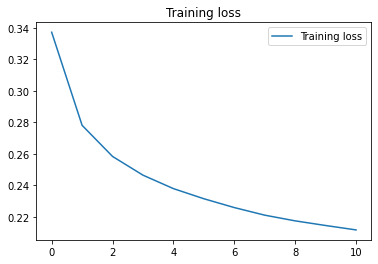

In [87]:
# Plotting results

import matplotlib.pyplot as plt

loss = history.history['loss'] 
epochs = range(len(loss))

plt.plot(epochs, loss,  label='Training loss')
plt.title('Training loss')
plt.legend()
plt.show()